<a href="https://colab.research.google.com/github/akmadan/PythonForFinance/blob/main/2.%20Drawing_Line_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drawing Charts for Visual Analysis**

In [18]:
# !pip install yfinance
# !pip install cufflinks

In [27]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Plotly and Cufflinks
import plotly

## For Using in Colab, we need to set renderer as colab
import plotly.io as pio
pio.renderers.default = 'colab'
import cufflinks as cf

In [20]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [21]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as data


yf.pdr_override()

start = datetime.strptime('2010-01-01', '%Y-%m-%d')
end = datetime.strptime('2020-01-01', '%Y-%m-%d')

sbi = data.get_data_yahoo("SBIN.NS", start, end)

sbi.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,202.633789,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,202.708954,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,203.925018,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,202.784134,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,202.178329,10453820


**Drawing a Simple Line Chart for Closing Price**

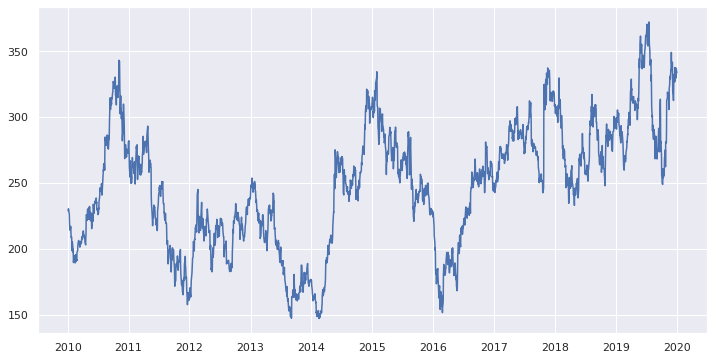

In [22]:
plt.figure(figsize=(12,6))
plt.plot(sbi['Close'])
plt.show()

**Plotting For a Range of Dates**

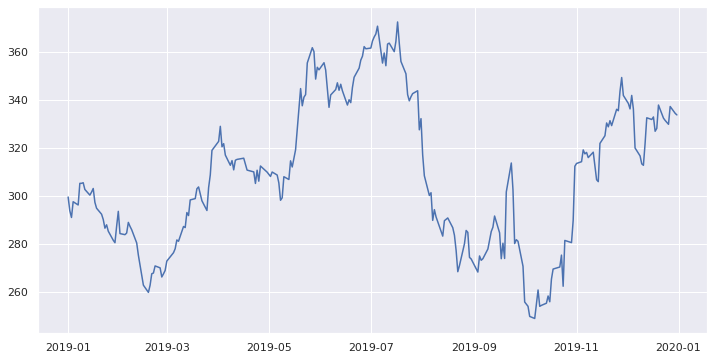

In [23]:
plt.figure(figsize=(12,6))
plt.plot(sbi.loc['2019-01-01': '2020-12-31']['Close'])
plt.show()

**Using Cufflinks and Plotly**

In [24]:
cf.set_config_file(offline=True)

In [30]:
sbi['Close'].iplot()

In [37]:
plt.figure(figsize = (12,6))
sbi.loc[:, ['Low', 'High']].iplot()
plt.show()

<Figure size 864x432 with 0 Axes>